# ALVIATUL NAZILA
# 202010370311293
# Analisis Big Data B

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [103]:
df_studentInfo = pd.read_csv("./studentInfo.csv")
df_studentRegistration = pd.read_csv("./studentRegistration.csv")
df_assessments = pd.read_csv("./assessments.csv")
df_studentAssessment = pd.read_csv("./studentAssessment.csv")
df_studentVle = pd.read_csv("./studentVle.csv")
df_courses = pd.read_csv("./courses.csv")
df_vle = pd.read_csv("./vle.csv")


## student Info

In [104]:
df_studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [105]:
df_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [106]:
df_studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [107]:
df_studentInfo = df_studentInfo.dropna(subset=['imd_band'])

imd_band adalah kolom yang bertipe data object sehingga menggunakan fungsi dropna untuk menghapus data-data yang kosong pada kolom imd_band

In [108]:
df_studentInfo = df_studentInfo.drop_duplicates()

drop_duplicates digunakan untuk menghapus data duplikat

In [109]:
df_studentInfo.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## student Registration

In [110]:
df_studentRegistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [111]:
df_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [112]:
df_studentRegistration.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [113]:
df_studentRegistration["date_registration"].fillna(df_studentRegistration["date_registration"].mean(), inplace=True)
df_studentRegistration["date_unregistration"].fillna(df_studentRegistration["date_unregistration"].mean(), inplace=True)

fillna adalah mengisi nilai null pada kolom, kolom date_registration dan date_unregistration bertipe data float maka disini untuk mengisi data kosong digunakan fungsi mean()

In [114]:
df_studentRegistration = df_studentRegistration.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [115]:
df_studentRegistration.isnull().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## assessments

In [116]:
df_assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [117]:
df_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [118]:
df_assessments.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [119]:
df_assessments["date"].fillna(df_assessments["date"].mean(), inplace=True)

fillna adalah mengisi nilai null pada kolom, kolom date  bertipe data float maka disini untuk mengisi data kosong digunakan fungsi mean()

In [120]:
df_assessments = df_assessments.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [121]:
df_assessments.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## studentAssessment

In [122]:
df_studentAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [123]:
df_studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [124]:
df_studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [125]:
df_studentAssessment["score"].fillna(df_studentAssessment["score"].mean(), inplace=True)

fillna adalah mengisi nilai null pada kolom, kolom score bertipe data float maka disini untuk mengisi data kosong digunakan fungsi mean()

In [126]:
df_studentAssessment = df_studentAssessment.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [127]:
df_studentAssessment.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## studentVle

In [128]:
df_studentVle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [129]:
df_studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [130]:
df_studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [131]:
df_studentVle = df_studentVle.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [132]:
df_studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## courses

In [133]:
df_courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [134]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [135]:
df_courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [136]:
df_courses = df_courses.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [137]:
df_courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## vle

In [138]:
df_vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


digunakan untuk melihat apa isi dari data dan melihat sejumlah baris terakhir dari data

In [139]:
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


fungsi dari info () adalah untuk melihat informasi secara rinci tentang data sehingga kita lebih mudah untuk melakukan processing

In [140]:
df_vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

fungsi dari isnull().sum() adalah untuk melihat apakah ada nilai kosong pada masing-masing kolom, sehingga memudahkan kita untuk menghapus data kosong

In [141]:
df_vle["week_from"].fillna(df_vle["week_from"].mean(), inplace=True)
df_vle["week_to"].fillna(df_vle["week_to"].mean(), inplace=True)

fillna adalah mengisi nilai null pada kolom, kolom week_from dan week_to bertipe data float maka disini untuk mengisi data kosong digunakan fungsi mean()

In [142]:
df_vle = df_vle.drop_duplicates()

drop_duplicates dugunakan untuk menghapus data ganda / duplikat

In [143]:
df_vle.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

melihat apakah masih ada data yang kosong pada data

## Korelasi

In [144]:
df1 = pd.DataFrame(df_studentInfo)
df2 = pd.DataFrame(df_studentRegistration)

In [145]:
# grup dataset berdasarkan kolom "id_student"
grup = pd.merge(df1, df2, on='id_student', how='inner')

In [146]:
# Cek duplikasi id_student
grup.duplicated('id_student').sum()

11586

In [147]:
grup = grup.drop_duplicates('id_student')

In [148]:
grup.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA,2013J,-159.0,49.757645
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,AAA,2013J,-53.0,49.757645
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,AAA,2013J,-92.0,12.000000
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,AAA,2013J,-52.0,49.757645
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,AAA,2013J,-176.0,49.757645


### Hubungan antara siswa disabilitas dengan gender

In [149]:
df = pd.DataFrame(grup)

In [150]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.dtypes

code_module_x             int32
code_presentation_x       int32
id_student                int64
gender                    int32
region                    int32
highest_education         int32
imd_band                  int32
age_band                  int32
num_of_prev_attempts      int64
studied_credits           int64
disability                int32
final_result              int32
code_module_y             int32
code_presentation_y       int32
date_registration       float64
date_unregistration     float64
dtype: object

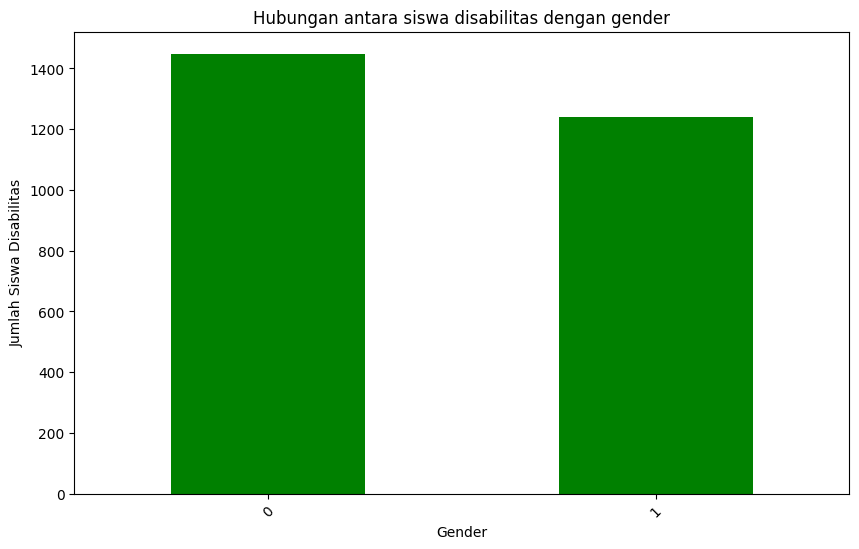

In [151]:
# Menghitung jumlah siswa dengan disabilitas untuk setiap code_presentation
disability_counts = df.groupby('gender')['disability'].sum()

# Menampilkan hasil korelasi dalam bentuk diagram batang
plt.figure(figsize=(10, 6))
disability_counts.plot(kind='bar', color='green')
plt.title('Hubungan antara siswa disabilitas dengan gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Siswa Disabilitas')
plt.xticks(rotation=45)  # Untuk mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.show()